In [ ]:
# !pip install torch torchvision timm matplotlib

import torch
import torchvision.transforms as T
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from PIL import Image
import timm  # Pretrained models


* We import PyTorch, Torchvision, Matplotlib, and timm, a popular PyTorch image models library.
* timm.create_model('vit_base_patch16_224', pretrained=True) loads a pretrained Vision Transformer model.

This model expects:
* **Input size**: 224×224
* **Patches**: 16×16
* => it splits each image into (224/16)² = **196** patches

In [ ]:
# Load a ViT from timm
model = timm.create_model('vit_base_patch16_224', pretrained=True)
model.eval();  # set to evaluation mode


* We resize the image to 224×224
* Normalize the pixel values
* Add a **batch dimension** so the shape becomes [1, 3, 224, 224]

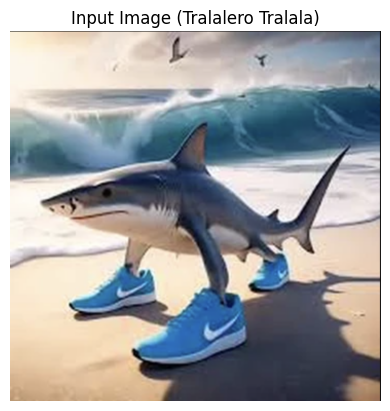

In [ ]:
# image to classify
img = Image.open("/content/sample_data/Screenshot 2025-04-08 at 5.50.16 PM.png").convert("RGB")

# transform the image to 224x224 (ViT input size) and normalize
transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
input_tensor = transform(img).unsqueeze(0)  # add batch dimension

# show the image
plt.imshow(img)
plt.title("Input Image (Tralalero Tralala)")
plt.axis("off")
plt.show()


When we do:

```output = model(input_tensor)```

What actually happens is:

1. Patch Embedding:

* The image is split into 196 patches (16×16 each)
* Each patch is flattened and passed through a linear layer to become a vector (e.g. 768-dim)

2. Positional Embedding:

* Since transformers don't understand order, we add position info to each patch vector (just like in NLP)

3. Transformer Encoder:

* Applies multi-head self-attention, meaning each patch looks at all others to learn context
* Multiple such layers are stacked

4. [CLS] Token:

* A special learnable token that aggregates information from all patches
* Its final embedding is passed to a classifier head (usually a Linear layer)

Finally,

* The output is a vector of class scores (1 per class in ImageNet = 1000 classes)
* We use argmax to find the class with the highest probability

In [ ]:
# get prediction
with torch.no_grad():
    output = model(input_tensor)

# decode prediction
predicted_class = output.argmax().item()

# load labels (ImageNet)
import json
from urllib.request import urlopen

labels_url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
labels = [line.strip() for line in urlopen(labels_url)]

print(f"Predicted Class: {labels[predicted_class]}")


Predicted Class: b'hammerhead'


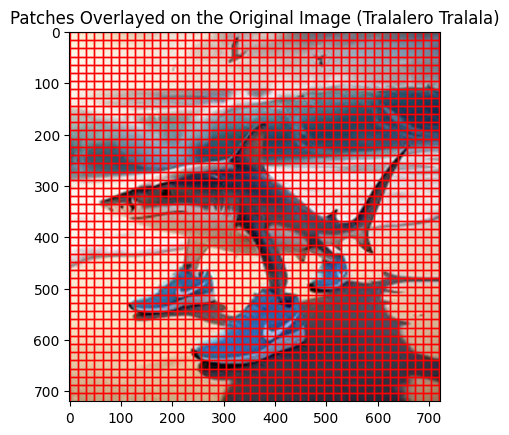

In [ ]:
def show_patches(img, patch_size=16):
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.set_title("Patches Overlayed on the Original Image (Tralalero Tralala)")
    w, h = img.size
    for i in range(0, w, patch_size):
        for j in range(0, h, patch_size):
            rect = plt.Rectangle((i, j), patch_size, patch_size, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
    plt.show()

show_patches(img)

You can tweak the model, try different images, or even train on a small dataset like CIFAR-10 using timm or transformers.